# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [2]:
import os

os.chdir('/Users/aly/Desktop/Main/School_Files/S2/QBIO/qbio_490_alexzhang/analysis_data')

In [ ]:
os.getcwd()

## (1) Introduction to CPTAC

To install CPTAC, we will use the `cptac` package. CPTAC, which stands for Clinical Proteomics Tumor Analysis Consortium, is a bit like TCGA in that it is publicly available big data for many different cancer but it focuses mostly on proteomics and proteogenomic data. One cool thing about CPTAC is that its proteomics data is *in conjunction* with TCGA clinical data, so CPTAC and TCGA share patients and we can extract more about their protein expression as an added layer of analysis using CPTAC.

The thing about proteomic data is that it doesn't use absolute counts like RNA data. Instead, proteomics data shows the **relative expression/intensity** instead of counts. This makes it easier to compare protein expression data among different groups/demographics of interest because we have a reference value. 

### Installing and importing `cptac` &#8592; we already did this!
The `cptac` package is similar to `TCGAbiolinks`. The information in `cptac` is stored using pandas dataframes. Just like in R, we need to install `cptac` before loading it into our environment. If you haven't installed it yet, just run the code chunk below. If you get an error, you will have to take the following steps:

1. Shut down jupyter notebook in the terminal with CTRL+C.
2. Make sure that you have deactivated your base environment and activated your qbio_student environment.
3. Run `pip install cptac`.
4. Open the tutorial again through jupyter.

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the one of interest (BRCA in our case).
4. Load it into our python environment.

In [5]:
# 1. Import cptac
import cptac
# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [6]:
# 3. Download the breast cancer data set -- fill in dataset!
cptac.download(dataset="Brca")
# 4. Load the breast cancer data set
brca = cptac.Brca()

Now, we have our brca object containing a bunch of data. We can use the list_data() function the data available for the breast cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the broad proteomics data for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the brca object to examine the different data contained in the brca object. Much like calling functions from a package, we can use the brca.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [7]:
# Run the list_data() function
brca.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [9]:
protein_data = brca.get_proteomics() # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [10]:
# import packages here
import pandas as pd
import numpy as np

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [11]:
## Explore the data frame here and answer questions
protein_data.shape

(122, 10107)

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [15]:
protein_data.loc["patient_id","gene"] # this is the general case, you have to fill in actual IDs/protein names

1.9239

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
## Answer question in comment form here
##If reference level is 0, then the number that would represent higher expression is a number higher than 0, while the number that would represent lower expression is a number lower than 0.

**Exericse 2.4**

Print the relative fold change of patient `X01BR008` in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [16]:
## write code here
protein_data.loc['X01BR008', 'TP53']

1.9239

### Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [17]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [18]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [19]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [20]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [26]:
# write code here
high_TP53_mask = protein_data.loc[:, 'TP53'] >= 1
high_TP53 = protein_data.loc[high_TP53_mask, :]

ARF1_expression = np.where(high_TP53.loc[:, 'ARF1'] > 1, 'High', \
                           np.where(high_TP53.loc[:, 'ARF1'] < -1, 'Low', 'Average'))

high_TP53.loc[ARF1_expression == 'Average']

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
X01BR018,1.9579,2.4185,1.1549,0.0683,-3.3943,1.1572,NaN,-0.4773,-1.1339,0.4581,...,0.0542,0.2124,-0.6686,0.5360,0.8360,NaN,0.3872,-0.5221,-0.1490,1.3674
X01BR027,-0.2538,1.6724,5.3316,1.0390,-2.0366,-0.0884,0.4793,0.0829,-0.2199,-1.0067,...,-4.2915,-0.5008,1.0470,0.3797,0.4653,0.6924,-0.0426,-0.2040,-1.0008,0.4036
X03BR006,-1.8078,-1.3432,1.5244,0.9868,-1.0213,NaN,NaN,-1.7108,-0.5038,-2.3528,...,-1.6615,-0.4434,0.4015,0.7380,1.1971,0.6393,-0.5385,0.1729,-0.3666,-0.4233
X05BR001,-0.5433,0.2689,-3.7788,-0.3203,-5.1510,0.6458,-1.8199,0.3194,0.4998,-0.2009,...,-1.2413,0.3326,0.0141,-0.0708,0.3618,-0.8671,-0.0443,1.9570,-0.4398,-0.0761
X09BR004,-0.8516,-0.0405,-2.6649,0.2353,-0.3737,-0.8489,NaN,-0.1252,-0.4256,-3.4295,...,-1.3950,0.0550,0.9153,2.4992,3.2447,-0.0596,1.1064,-0.6249,0.1233,-0.9581
X11BR024,-1.5691,0.6150,-3.6298,0.4059,0.6553,-0.1684,NaN,-0.6950,0.2044,1.6932,...,-0.3070,-0.3423,-0.0727,1.1138,0.0432,NaN,-0.7201,0.0507,-0.3347,0.2699


In [25]:
ARF1_expression

array(['Average', 'Average', 'Average', 'Average', 'Average', 'Low',
       'Average', 'Average', 'Low', 'Average', 'Average'], dtype='<U7')

In [22]:
high_TP53_mask

Patient_ID
CPT000814     True
CPT001846    False
X01BR001     False
X01BR008      True
X01BR009      True
             ...  
X21BR001     False
X21BR002     False
X21BR010     False
X22BR005     False
X22BR006     False
Name: TP53, Length: 122, dtype: bool

## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the brca object. The function name is very similar in syntax to the get_proteomics() function from before!

In [27]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [28]:
# explore the data frames using shape, axes, and other functions we've gone over.
clinical_data

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,16,128N,NaN,NaN,LumB,LumB-I,0.536,NaN,NaN,white,negative,negative,NaN,negative,positive,negative
X21BR002,X21BR002,Tumor,16,128C,NaN,NaN,LumA,LumB-I,0.443,NaN,NaN,white,positive,positive,NaN,negative,negative,negative
X21BR010,X21BR010|X21BR010.REP1,Tumor,3|17,129C|128C,Stage IIA,18.0,LumA,LumA-I,0.559,852.0,female,white,positive,positive,negative,negative,negative,negative


The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [29]:
# write code here
clinical_age_mask = clinical_data.loc[:, 'Age.in.Month'] > 12*50
masked_clinical = clinical_data[clinical_age_mask]
masked_clinical

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR018,X01BR018,Tumor,7,129N,Stage IIIA,1.0,Basal,Basal-I,0.915,792.0,female,white,positive,negative,negative,negative,negative,negative
X01BR025,X01BR025,Tumor,9,127N,Stage IIIA,6.0,LumA,LumB-I,0.551,744.0,female,black.or.african.american,positive,positive,equivocal,negative,negative,negative
X01BR027,X01BR027,Tumor,3,127N,Stage IIA,8.0,Basal,Basal-I,1.000,960.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR030,X01BR030,Tumor,7,128C,Stage IIIA,4.0,LumA,LumA-I,0.409,1010.0,female,black.or.african.american,positive,positive,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X20BR006,X20BR006,Tumor,17,128N,Stage IIB,18.0,Basal,Basal-I,0.728,786.0,female,white,positive,negative,negative,negative,negative,negative
X20BR007,X20BR007,Tumor,5,130N,Stage IIA,16.0,Basal,Basal-I,0.609,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X20BR008,X20BR008,Tumor,5,127C,Stage IIIB,11.0,Her2,HER2-I,0.481,863.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative


Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [30]:
#NOT DONE

# 1.
name_intersects = [
    np.intersect1d(protein_data.index, rna_data.index), # 0. fill in intersecting for protein/rna here using intersect1d()
    np.intersect1d(protein_data.index, masked_clinical.index), # 1. fill in intersecting for protein/masked clinical here
    np.intersect1d(rna_data.index, masked_clinical.index), # 2. fill in the intersecting for rna/masked clinical here
]

names = ['Protein/RNA', 'Protein/Clinical', 'RNA/Clinical']

# 2. Print the lengths here
# write a for loop here
    #print(f"The length of ____ is _____")  # fill in here
for n in range(len(name_intersects)):
    print(f"The length of {names[n]} is {len(name_intersects[n])}")
# 3. Which comparison(s) contain the patient names that have all three levels?




The length of Protein/RNA is 122
The length of Protein/Clinical is 79
The length of RNA/Clinical is 79


## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [31]:
# write code here
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [34]:
# convert ages here!
clinical_data['Age'] = clinical_data['Age.in.Month']/12

In [35]:
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status,Age
Patient_ID,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative,NaN
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative,NaN
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative,55.0
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative,NaN
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative,NaN


There are actually control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [36]:
# Get the levels of the Sample_Tumor_Normal column with unique()
clinical_data["Sample_Tumor_Normal"].unique()

array(['Tumor'], dtype=object)

__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time).
   2. Create an age_category column in clinical_data. As before, we'll define "Young" as under 50, and "Old" as 50 and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to replace these NaN values in the Stage column with "No cancer".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have No cancer, Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Compare your results to the barplot. Do your numbers make sense?

In [51]:
age_categories = np.where(clinical_data.loc[:, 'Age'] >= 50, 'Old', \
                          np.where(clinical_data.loc[:, 'Age'] < 50, 'Young', np.nan))
nan_mask = clinical_data.loc[:, 'Stage'] == pd.NA

IndexingError: Too many indexers

In [53]:
clinical_data.iloc[4, 'Stage']

IndexingError: Too many indexers

In [49]:
nan_mask

Patient_ID
CPT000814    False
CPT001846    False
X01BR001     False
X01BR008     False
X01BR009     False
             ...  
X21BR001     False
X21BR002     False
X21BR010     False
X22BR005     False
X22BR006     False
Name: Stage, Length: 122, dtype: bool

In [54]:
# 1. Import libraries here
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create the age_category column in clinical_data
age_categories = np.where(clinical_data.loc[:, 'Age'] >= 50, 'Old', \
                          np.where(clinical_data.loc[:, 'Age'] < 50, 'Young', np.nan))

# 3. Replace NaN with No cancer

nan_mask = clinical_data.loc[:, 'Stage'] == "nan"
clinical_data.loc[:, 'Stage']

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:, 'Stage'])
assert(np.all(stage_categories == ['No cancer', 'Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    for ...:
        # 1. create a subset of the data frame with the old/young patients
        # 2. count the number of patients with the stage of cancer and print


        
# 5. A sample barplot to compare your results
clinical_data_copy = clinical_data
clinical_data_copy["Stage"] = np.where(pd.isna(clinical_data["Stage"]), "No cancer", clinical_data["Stage"])
sns.countplot(
    x = "age_category",
    hue = "Stage",
    hue_order = stage_categories,
    data = clinical_data_copy
)

plt.show()

SyntaxError: cannot assign to Ellipsis (1684711718.py, line 24)

# Plotting Proteomic Data

## 1) Plotting with matplotlib
Let's explore some more complex ways to plot using the Matplotlib package.

Import pyplot from matplotlib as its common handle (plt)

In [55]:
# Write code here
import matplotlib.pyplot as plt

In [56]:
clinical_data

Patient_ID
CPT000814    False
CPT001846    False
X01BR001     False
X01BR008     False
X01BR009     False
             ...  
X21BR001     False
X21BR002     False
X21BR010     False
X22BR005     False
X22BR006     False
Name: Stage, Length: 122, dtype: bool

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 1.1** Plot the expression data of a chosen protein stratified between young (58) and old (58) patients.

In [ ]:
young_mask = clinical_data.loc[:, 'Age'] < 58 # the age column is 'Age.in.Month', which (as stated) is in months
old_mask = clinical_data.loc[:, 'Age'] >= 58

young = (protein_data.loc[young_mask], 'AAGAB').dropna()
old = (protein_data.loc[old_mask], 'AAGAB').dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

In [ ]:
#NOT DONE

fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2], ["Old Patients", "Young Patients"]) # use \n for new line if desired
plt.ylabel('AAGAB Expression')


plt.show()

**Exercise 1.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here
##lines at -1, 0, and 1 in order to see the important values of log2FoldChange. 1 means 1.0x more expression, 0 = no change, and -1.0x = less expression.

## (2) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [61]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

Luckily for us, all 122 patients in the Brca dataset have clinical, transcriptomic, and proteomic data. If this were not the case (such as in the colon cancer database), we would use intersect1d() to fix this. We will still need to use intersect1d() to determine which genes are shared.

**Exercise 2.1** To make sure the data frames match:

1. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
2. Create the rna_shared and prot_shared data frames; ie dataframes with only genes that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [62]:
# 1. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(rna_data.columns, protein_data.columns)

# 2. Create the two data frames
rna_shared = rna_data.loc[:, shared_rna_prot]
prot_shared = protein_data.loc[:, shared_rna_prot]

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 2.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [63]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["AAGAB"], prot_shared["AAGAB"], nan_policy="omit")

print(f"The correlation of AAGAB is {round(corr, 3)} (p = {round(pval, 10)}).")

The correlation of AAGAB is 0.633 (p = 0.0).


**Exercise 2.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here
##The Spearman correlation of AAGAB is 0.633, meaning that it is moderately correlated 

## (3) Heatmaps
**Exercise 3.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [65]:
import seaborn as sns

In [ ]:
rna_data.loc[:, 0:20]

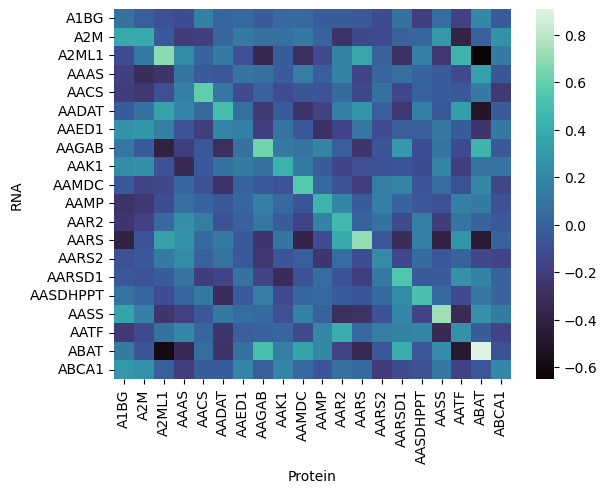

In [72]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = protein_data.columns[:20] # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy='omit')
        corr_df.loc[g1, g2] = corr

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!

## (4) Plotting with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in,Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)


fig.suptitle('Age vc. DYNLT3')

plt.show()

**Exercise 4.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing
<br></br>NOTE: you will need to Google to figure out how to do most of the above things!

In [ ]:
# create plot here


fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax[0]  # necessary for when plotting more than 1 subplot
)

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age"],
    y = protein_data.loc[:, "AAGAB"],# y-axis
    legend = "full",  # show the legend
    ax = ax[2]  # necessary for when plotting more than 1 subplot
)


fig.suptitle('Age vc. DYNLT3')

plt.show()

## (5) Saving Plots
Finally, to save a plot, we can call plt.savefig() instead of the plt.show().

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('/Users/aly/Desktop/Main/School_Files/S2/QBIO/qbio_490_alexzhang/analysis_data/week10_python/age_scatter.png', bbox_inches='tight')